# Projeto 2

__Nome:__ Vitor Augusto Henrique Brisola

__NºUSP:__ 9791292

## Bibliotecas

In [3]:
from numpy  import *
import numpy as np
np.random.seed(100)

In [4]:
import matplotlib.pyplot as plt

In [5]:
import networkx as nx

In [6]:
import os

In [7]:
import pandas as pd

In [8]:
from scipy.linalg import expm

In [9]:
import random as rand

## Redes

In [10]:
# setting working directory
os.chdir('/home/vitor/Grad/Sem/8/Redes_Complexas/project/nets/');

In [11]:
# printing network
def print_net(N,with_labels=False,node_size=50,font_size= 16,label=None): 
    '''
    Draws N network.
    '''
    if with_labels:
        labels = N.nodes()
    pos=nx.spring_layout(N)
    nx.draw(N, with_labels =  with_labels, node_size=node_size, font_size=font_size,pos=pos,label=label)
    plt.show(True)

In [12]:
# net importing
def get_net(file_name,nodetype=str,data=(('weight',float),), show = False):
    # reading
    #file_type = file_name.split('.')[1]
    G = nx.read_edgelist(file_name, nodetype=nodetype, data=data)
    # drawing network
    if show:
        printnet(G)
    return G

## Medidas de Centralidade

### Degree Centrality

In [13]:
def degree_centrality(G):
    vk = dict(G.degree())
    vk = list(vk.values())
    vk = np.array(vk).astype(float)
    #print('Degree centrality', vk)
    return vk

### Closeness Centrality

In [14]:
def closeness_centrality(G):
    CLC = dict(nx.closeness_centrality(G))
    CLC = list(CLC.values())
    CLC = np.array(CLC).astype(float)
    #print('Closeness centrality', CLC)
    return CLC

### Betweenness centrality

In [15]:
def betweeness_centrality(G):
    B = dict(nx.betweenness_centrality(G))
    B = list(B.values())
    #print('Betweeness centrality:', B)
    B = np.array(B).astype(float)
    return B

### Eigenvector centrality

In [16]:
def eigenvector_centrality(G,max_iter=1000):
    EC = dict(nx.eigenvector_centrality(G, max_iter))
    EC = list(EC.values())
    #print('Eigenvetor centrality:', EC)
    EC = np.array(EC).astype(float)
    return EC

### Page-rank

In [17]:
def page_rank(G):
    PR = dict(nx.pagerank(G, alpha=0.85))
    PR = list(PR.values())
    #print("PageRank: ", PR)
    PR = np.array(PR)
    return PR

### K-Core

In [18]:
def k_core(G):
    KC= dict(nx.core_number(G))
    #print('k-core:', KC)
    KC = list(KC.values())
    KC = np.array(KC).astype(float)
    return KC

### Random walk accessibility

In [19]:
def acc(G):
    N = len(G.nodes())
    vk = dict(G.degree())
    vk = list(vk.values())
    A = nx.adjacency_matrix(G)
    P = np.zeros((N,N), dtype = 'float')
    for i in np.arange(0, N):
        for j in np.arange(i, N):
            P[i,j] = A[i,j]/vk[i]
            P[j,i] = P[i,j]
    P2 = expm(P)/np.exp(1)
    vacc = np.zeros(N, dtype = float)
    for i in np.arange(0, N):
        acc = 0
        for j in np.arange(0,N):
            if(P2[i,j] > 0):
                acc = acc + P2[i,j]*log(P2[i,j])
        acc = np.exp(-acc)
        vacc[i] = acc
    vacc = list(vacc)
    vacc = np.array(vacc).astype(float)
    return vacc

### <font color='red'>Communicability centrality</font>

In [20]:
def communicability_centrality(G):
    A = nx.to_numpy_matrix(G)
    A = np.squeeze(np.asarray(A))
    CC = expm(A)
    return CC

# Exercício 1

## Rotinas para o calculo da Correlação

In [38]:
def centrality_measures_ds(G):
    '''
    Centrality Measures Data Structure
    '''
    
    vk   = degree_centrality(G)
    CLC  = closeness_centrality(G)
    B    = betweeness_centrality(G)
    EC   = eigenvector_centrality(G)
    PR   = page_rank(G)
    KC   = k_core(G)
    vacc = acc(G) # Random Walk Accessibility
    #CC   = communicability_centrality(G)
    
    #return {'K':vk,'CLC':CLC}
    return {'K':vk,'CLC':CLC,'B':B,'EC':EC,'PR':PR,'KC':KC,'ACC': vacc}

In [39]:
def correlation_matrix(ds):
    df = pd.DataFrame(ds)
    corr = df.corr()
    return corr

In [40]:
def correlation_plot(corr):
    plt.figure(figsize=(7,7))
    plt.imshow(corr, cmap='Blues', interpolation='none', aspect='auto')
    plt.colorbar()
    plt.xticks(range(len(corr)), corr.columns, rotation='vertical', fontsize=20)
    plt.yticks(range(len(corr)), corr.columns, fontsize=20);
    plt.suptitle('Correlation between centrality measures', fontsize=20)
    plt.grid(False)
    plt.show()

## A) E-Road

In [41]:
G_euro = get_net('euroroad.txt')
print(len(G_euro))

1174


In [34]:
ds = centrality_measures_ds(G_euro)

In [35]:
corr = correlation_matrix(ds)

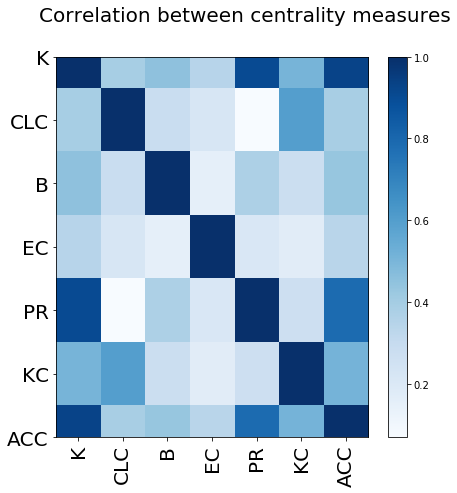

In [41]:
correlation_plot(corr)

In [42]:
G_euro.clear()

## B) Hamsterster friendships

In [45]:
G_ham = get_net('petster-friendships-hamster-uniq.txt')
print(len(G_ham))

1858


In [48]:
ds = centrality_measures_ds(G_ham)

In [49]:
corr = correlation_matrix(ds)

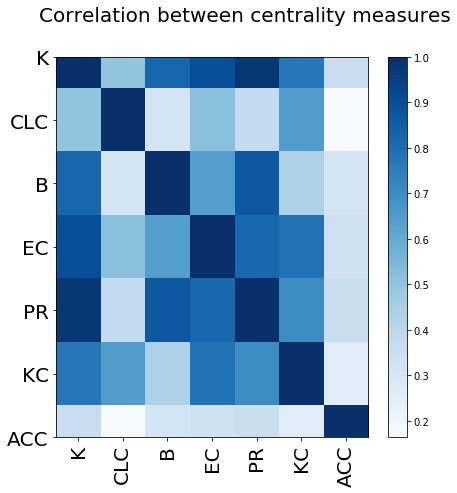

In [50]:
correlation_plot(corr)

In [51]:
G_ham.clear()

## <font color='red'>C) Elegans Neural Network</font>

In [43]:
G_elegans = get_net('celegansneural.txt')
print(len(G_elegans))

In [34]:
ds = centrality_measures_ds(G_elegans)

In [35]:
corr = correlation_matrix(ds)

In [40]:
correlation_plot(corr)

In [ ]:
G_elegans.clear()

## D) US airports

In [52]:
G_air = get_net('usairport_2.txt')
print(len(G_air))

500


In [53]:
ds = centrality_measures_ds(G_air)

In [54]:
corr = correlation_matrix(ds)

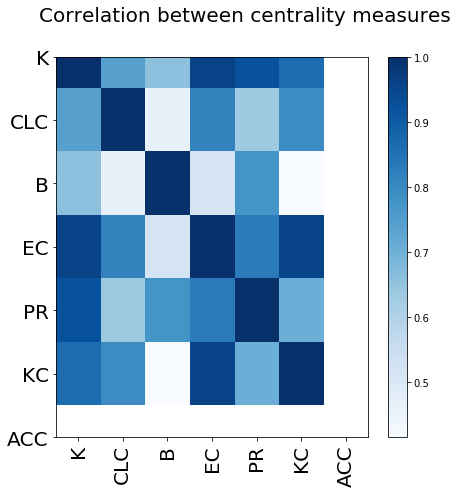

In [55]:
correlation_plot(corr)

In [56]:
G_air.clear()

# Exercício 2

In [45]:
def get_largest_component(G,show = False):
    Gcc=sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)
    G=Gcc[0]
    # drawing largest component
    if show:
        print_net(G)
    return G

In [52]:
def get_sample(G,sample_size):
    sampled_nodes = rand.sample(G.nodes, sample_size)
    G_sample = G.subgraph(sampled_nodes)
    G_sample_lc = get_largest_component(G_sample)
    
    return G_sample_lc

In [47]:
# Cities data vector
data = {}

## I) Nova York

### Carregando Cidade e Extraindo Amostra

In [48]:
# Carregando grafo completo da cidade
G = nx.read_graphml('cities/New_York.graphml.xml')
len(G)

55206

In [50]:
# extraing maior componente
G = get_largest_component(G.to_undirected())
G = nx.convert_node_labels_to_integers(G, first_label=0)
len(G)

55206

In [56]:
# extraindo amostra aleatória de parte da cidade
sample_size = 35000 # tamanho da amostra em número de nós
G_sample = get_sample(G,sample_size)
G_sample = nx.convert_node_labels_to_integers(G_sample, first_label=0)
len(G_sample)

2852

In [57]:
G.clear()

In [58]:
G = G_sample

### Calculando Dados da cidade (Degree, Closeness Centrality e  Betweeness Centrality)

In [59]:
# Degree
vk   = degree_centrality(G)

In [60]:
# Closeness
CLC  = closeness_centrality(G)

In [62]:
# Betweeness
B    = betweeness_centrality(G)

In [63]:
data['ny'] = {'vk':vk,'CLC':CLC,'B':B}

In [76]:
for measure in data['ny']:
    print(measure+': '+ str(np.mean(data['ny'][measure])))

vk: 2.453716690042076
CLC: 0.009755615227107158
B: 0.03735324708118522


In [64]:
G.clear()

## II) Paris

### Carregando Cidade e Extraindo Amostra

In [65]:
# Carregando grafo completo da cidade
G = nx.read_graphml('cities/Paris.graphml.xml')
len(G)

10104

In [66]:
# extraing maior componente
G = get_largest_component(G.to_undirected())
G = nx.convert_node_labels_to_integers(G, first_label=0)
len(G)

10104

In [67]:
# extraindo amostra aleatória de parte da cidade
sample_size = 7000 # tamanho da amostra em número de nós
G_sample = get_sample(G,sample_size)
G_sample = nx.convert_node_labels_to_integers(G_sample, first_label=0)
len(G_sample)

3027

In [68]:
G.clear()

In [69]:
G = G_sample

### Calculando Dados da cidade (Degree, Closeness Centrality e  Betweeness Centrality)

In [70]:
# Degree
vk   = degree_centrality(G)

In [71]:
# Closeness
CLC  = closeness_centrality(G)

In [72]:
# Betweeness
B    = betweeness_centrality(G)

In [73]:
data['ps'] = {'vk':vk,'CLC':CLC,'B':B}

In [77]:
for measure in data['ps']:
    print(measure+': '+ str(np.mean(data['ps'][measure])))

vk: 2.3858605880409645
CLC: 0.009083631851162528
B: 0.03754502020854101


In [ ]:
G.clear()

## III) Miami

### Carregando Cidade e Extraindo Amostra

In [78]:
# Carregando grafo completo da cidade
G = nx.read_graphml('cities/Miami.graphml')
len(G)

7586

In [79]:
# extraing maior componente
G = get_largest_component(G.to_undirected())
G = nx.convert_node_labels_to_integers(G, first_label=0)
len(G)

7535

In [85]:
# extraindo amostra aleatória de parte da cidade
sample_size = 5000 # tamanho da amostra em número de nós
G_sample = get_sample(G,sample_size)
G_sample = nx.convert_node_labels_to_integers(G_sample, first_label=0)
len(G_sample)

1549

In [86]:
G.clear()

In [87]:
G = G_sample

### Calculando Dados da cidade (Degree, Closeness Centrality e  Betweeness Centrality)

In [88]:
# Degree
vk   = degree_centrality(G)

In [89]:
# Closeness
CLC  = closeness_centrality(G)

In [90]:
# Betweeness
B    = betweeness_centrality(G)

In [91]:
data['mi'] = {'vk':vk,'CLC':CLC,'B':B}

In [92]:
for measure in data['mi']:
    print(measure+': '+ str(np.mean(data['mi'][measure])))

vk: 2.408005164622337
CLC: 0.018036807907177075
B: 0.036490579236483904


In [93]:
G.clear()

## IV) San Francisco

### Carregando Cidade e Extraindo Amostra

In [94]:
# Carregando grafo completo da cidade
G = nx.read_graphml('cities/San_Francisco.graphml')
len(G)

9367

In [95]:
# extraing maior componente
G = get_largest_component(G.to_undirected())
G = nx.convert_node_labels_to_integers(G, first_label=0)
len(G)

9344

In [98]:
# extraindo amostra aleatória de parte da cidade
sample_size = 6000 # tamanho da amostra em número de nós
G_sample = get_sample(G,sample_size)
G_sample = nx.convert_node_labels_to_integers(G_sample, first_label=0)
len(G_sample)

1897

In [99]:
G.clear()

In [100]:
G = G_sample

### Calculando Dados da cidade (Degree, Closeness Centrality e  Betweeness Centrality)

In [101]:
# Degree
vk   = degree_centrality(G)

In [102]:
# Closeness
CLC  = closeness_centrality(G)

In [103]:
# Betweeness
B    = betweeness_centrality(G)

In [104]:
data['sf'] = {'vk':vk,'CLC':CLC,'B':B}

In [105]:
for measure in data['sf']:
    print(measure+': '+ str(np.mean(data['sf'][measure])))

vk: 2.433315761729046
CLC: 0.013706291120826086
B: 0.03952505322788769


In [106]:
G.clear()

### Comparando Dados

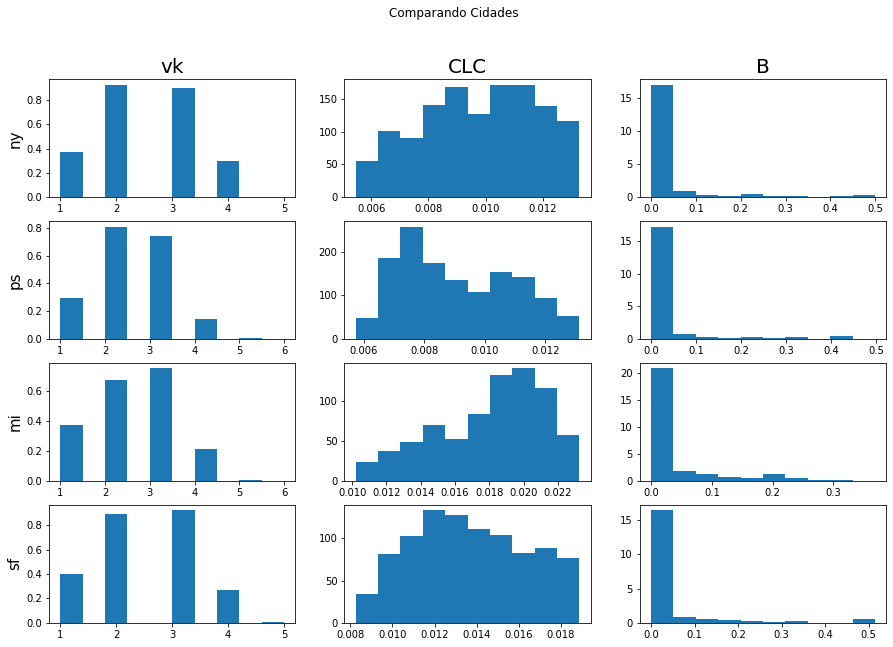

In [112]:
figsize = (15,10)
fig, ax = plt.subplots(4, 3,figsize=figsize)
fig.suptitle('Comparando Cidades')

for i,city in zip(range(0,len(data)),data):  
    for j,measure in zip(range(0,len(data[city])),data[city]):
        ax[i][j].hist(data[city][measure], density=True)
        if i == 0: ax[i][j].set_title(measure, fontsize=20)
        if j == 0: ax[i][j].set_ylabel(city, fontsize=15)
        #ax[i].set_xlabel("Node", fontsize=15)

    
#plt.grid(True)
#plt.savefig('visits.eps') #save the figure into a file
plt.show()

# Exercício 3

In [46]:
def horizontal_plot(data,subtitle=None,figsize=(15,5)):
    # ploting visits
    fig, ax = plt.subplots(1, len(data),figsize=figsize)
    if subtitle: fig.suptitle(subtitle)

    
    for i,element in zip(range(0,len(data)),data):
        ax[i].hist(data[element], density=True)
        ax[i].set_title(element, fontsize=20)
        #ax[i].set_ylabel("Degree", fontsize=15)
        #ax[i].set_xlabel("Node", fontsize=15)

    #plt.grid(True)
    #plt.savefig('visits.eps') #save the figure into a file
    plt.show()

## A) Human Protein Network

In [42]:
G = get_net('human_protein.txt',data=None) #unweighted

In [43]:
# calculando medidas
vk   = degree_centrality(G)
EC   = eigenvector_centrality(G)
PR   = page_rank(G)
CLC  = closeness_centrality(G)

In [44]:
data = {'Degree':vk,'Eigenvector':EC,'Page Rank': PR,'Closeness':CLC}

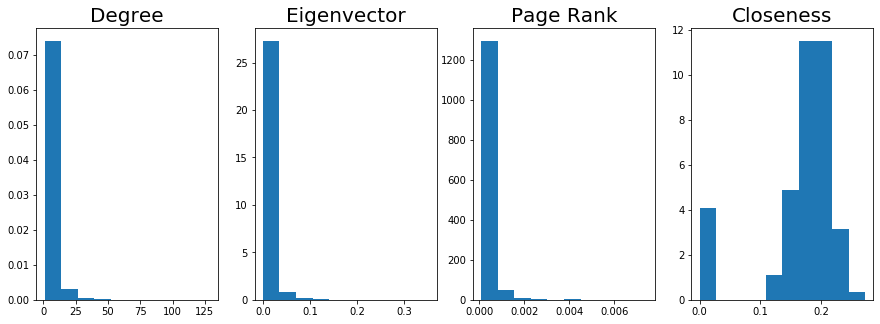

In [47]:
horizontal_plot(data)

In [48]:
G.clear()

## B) C elegans protein 2007

In [49]:
G = get_net('elegans_protein_2007.txt')

In [50]:
# calculando medidas
vk   = degree_centrality(G)
EC   = eigenvector_centrality(G)
PR   = page_rank(G)
CLC  = closeness_centrality(G)

In [51]:
data = {'Degree':vk,'Eigenvector':EC,'Page Rank': PR,'Closeness':CLC}

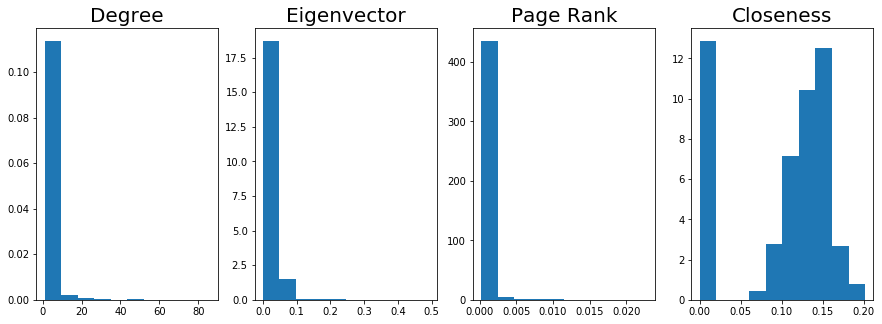

In [52]:
horizontal_plot(data)

In [53]:
G.clear()

## C) C elegans protein 2004

In [54]:
G = get_net('elegans_protein_2004.txt')

In [55]:
# calculando medidas
vk   = degree_centrality(G)
EC   = eigenvector_centrality(G)
PR   = page_rank(G)
CLC  = closeness_centrality(G)

In [56]:
data = {'Degree':vk,'Eigenvector':EC,'Page Rank': PR,'Closeness':CLC}

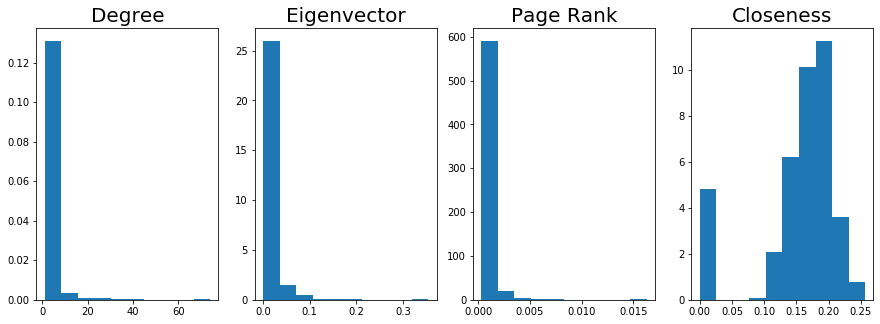

In [57]:
horizontal_plot(data)

In [58]:
G.clear()

## D) Western US power grid

In [62]:
#G = get_net('power/power.gml') # GML
G = nx.read_gml('power/power.gml',label=None)

In [63]:
# calculando medidas
vk   = degree_centrality(G)
EC   = eigenvector_centrality(G)
PR   = page_rank(G)
CLC  = closeness_centrality(G)

In [64]:
data = {'Degree':vk,'Eigenvector':EC,'Page Rank': PR,'Closeness':CLC}

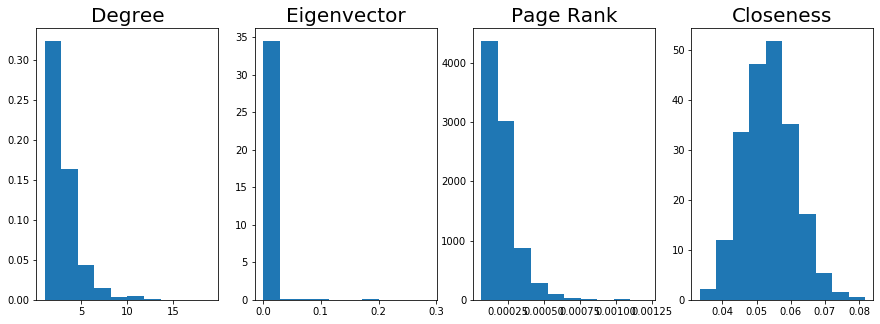

In [65]:
horizontal_plot(data)

In [ ]:
G_western_power.clear()

## <font color='red'>E) R dependency network</font>

In [25]:
G = get_net('dependencies.csv') # CSV

In [43]:
# calculando medidas
vk   = degree_centrality(G)
EC   = eigenvector_centrality(G)
PR   = page_rank(G)
CLC  = closeness_centrality(G)

In [44]:
data = {'Degree':vk,'Eigenvector':EC,'Page Rank': PR,'Closeness':CLC}

In [66]:
horizontal_plot(data)

In [ ]:
G.clear()

## <font color='red'>Conclusão</font>

# Exercício 4

In [21]:
from scipy.stats import entropy,moment

In [22]:
from sklearn.preprocessing import StandardScaler

In [26]:
from sklearn.decomposition import PCA

In [23]:
def measure_analisys(measure):
    data = np.zeros(4)
    data[0] = np.mean(measure)         # average
    data[1] = np.std(measure)          # standart deviation 
    data[2] = moment(measure,moment=2) # second moment
    data[3] = entropy(measure)         # shannon entropy
    return data

In [37]:
def feature_vector(G):
    feature_matrix = np.array()
    
    feature_matrix.append( measure_analisys(degree_centrality(G)))
    feature_matrix.append( measure_analisys(k_core(G)))
    feature_matrix.append( measure_analisys(closeness_centrality(G)))
    feature_matrix.append( measure_analisys(betweeness_centrality(G)))
    feature_matrix.append( measure_analisys(eigenvector_centrality(G)))
    #feature_matrix.append( measure_analisys(page_rank(G)))
    #feature_matrix.append( measure_analisys(acc(G))) # Random Walk Accessibility
    #feature_matrix.append( measure_analisys(communicability_centrality(G)))
    
    #vector = np.matrix.flatten(np.array(feature_matrix))
    
    return feature_matrix

In [54]:
def pca(features,n_comp=2):
    # Standardizing the features
    scaler = StandardScaler()
    scaler.fit(features)
    x = scaler.transform(features)
    pca = PCA(n_components=n_comp)
    principalComponents = pca.fit_transform(x)
    return principalComponents
    #return x

In [57]:
pca_list = {}

## A) Human Protein Network

In [29]:
G = get_net('human_protein.txt')
print(len(G))

3133


In [30]:
G.remove_edges_from(nx.selfloop_edges(G))

In [50]:
features = feature_vector(G)

In [58]:
pca_list['Human Protein Network'] = pca(features)

In [59]:
G.clear()

## B) C elegans protein 2007

In [60]:
G = get_net('elegans_protein_2007.txt')
print(len(G))

1496


In [61]:
G.remove_edges_from(nx.selfloop_edges(G))

In [62]:
features = feature_vector(G)

In [63]:
pca_list['C elegans protein 2007'] = pca(features)

In [64]:
G.clear()

## C) C elegans protein 2004

In [65]:
G = get_net('elegans_protein_2004.txt')
print(len(G))

1237


In [66]:
G.remove_edges_from(nx.selfloop_edges(G))

In [67]:
features = feature_vector(G)

In [68]:
pca_list['C elegans protein 2004'] = pca(features)

In [69]:
G.clear()

## D) Western US power grid

In [71]:
G = get_net('power/power.gml')
print(len(G))

In [61]:
G.remove_edges_from(nx.selfloop_edges(G))

In [62]:
features = feature_vector(G)

In [63]:
pca_list['Western US power grid'] = pca(features)

In [64]:
G.clear()

## E) R dependency network

In [72]:
G = get_net('dependencies.csv')
print(len(G))

2


In [61]:
G.remove_edges_from(nx.selfloop_edges(G))

In [62]:
features = feature_vector(G)

In [63]:
pca_list['R dependency network'] = pca(features)

In [64]:
G.clear()

# Exercício 5

In [115]:
from scipy.stats import pearsonr

## A) E-Road

In [103]:
G= get_net('euroroad.txt')
print(len(G))

1174


In [109]:
knn = nx.k_nearest_neighbors(G)

In [111]:
k = np.array([item for item in knn])
knn = np.array([item for item in knn.values()])

In [121]:
pear_coef,p_value = pearsonr(k,knn)
assort = nx.degree_assortativity_coefficient(G)

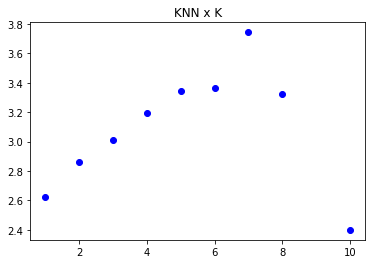

Pearson Correlation:	0.14814805856903462
Assortatiovity:	0.1266835739853625


In [125]:
plt.plot(k,knn,'bo')
plt.title('KNN x K')
plt.show()
print("Pearson Correlation:"+'\t'+str(pear_coef)+'\n'+"Assortatiovity:"+'\t'+str(assort))

In [126]:
G.clear()

## B) Elegans Neural Network

In [129]:
G = get_net('celegansneural.txt')
print(len(G))

In [109]:
knn = nx.k_nearest_neighbors(G)

In [111]:
k = np.array([item for item in knn])
knn = np.array([item for item in knn.values()])

In [121]:
pear_coef,p_value = pearsonr(k,knn)
assort = nx.degree_assortativity_coefficient(G)

In [130]:
plt.plot(k,knn,'bo')
plt.title('KNN x K')
plt.show()
print("Pearson Correlation:"+'\t'+str(pear_coef)+'\n'+"Assortatiovity:"+'\t'+str(assort))

In [ ]:
G.clear()

## C) US airports

In [131]:
G = get_net('usairport_2.txt')
print(len(G))

500


In [132]:
knn = nx.k_nearest_neighbors(G)

In [133]:
k = np.array([item for item in knn])
knn = np.array([item for item in knn.values()])

In [134]:
pear_coef,p_value = pearsonr(k,knn)
assort = nx.degree_assortativity_coefficient(G)

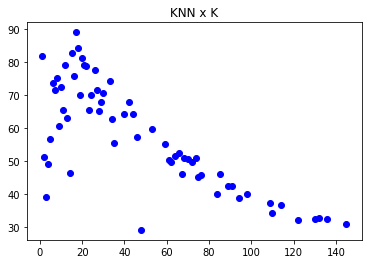

Pearson Correlation:	-0.7858660255874177
Assortativity:	-0.26786294344854117


In [136]:
plt.plot(k,knn,'bo')
plt.title('KNN x K')
plt.show()
print("Pearson Correlation:"+'\t'+str(pear_coef)+'\n'+"Assortativity:"+'\t'+str(assort))

In [137]:
G.clear()

## D) Human Protein Network

In [138]:
G = get_net('human_protein.txt',data=None) #unweighted
print(len(G))

3133


In [139]:
knn = nx.k_nearest_neighbors(G)

In [140]:
k = np.array([item for item in knn])
knn = np.array([item for item in knn.values()])

In [141]:
pear_coef,p_value = pearsonr(k,knn)
assort = nx.degree_assortativity_coefficient(G)

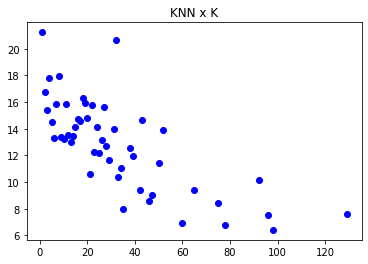

Pearson Correlation:	-0.7385027379659062
Assortatiovity:	-0.11403157605140872


In [142]:
plt.plot(k,knn,'bo')
plt.title('KNN x K')
plt.show()
print("Pearson Correlation:"+'\t'+str(pear_coef)+'\n'+"Assortatiovity:"+'\t'+str(assort))

In [143]:
G.clear()

# Exercício 6

# Exercício 7

# Exercício 8

# Exercício 9

## A) E-Road

In [46]:
G= get_net('euroroad.txt')
print(len(G))

1174


In [ ]:
G.clear()

## B) Elegans Neural Network

In [43]:
G = get_net('celegansneural.txt')
print(len(G))

In [ ]:
G.clear()

## C) US airports

In [52]:
G = get_net('usairport_2.txt')
print(len(G))

500


In [ ]:
G.clear()

## D) Human Protein Network

In [42]:
G = get_net('human_protein.txt',data=None) #unweighted
print(len(G))

In [ ]:
G.clear()

# Exercício 10